In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

In [7]:
df=pd.read_csv("../Nigerian_malaria.csv")

In [8]:
# Rename the columns : The column names in the dataset above have coded names.
#  We are going to assign human-readable names to the columns and print shape and head of the data.
df.columns=['Case Identification', 'Region', 'Type of Place of Residence', 'Source of Drinking Water', 'Type of Toilet Facility',
                'Has Electricity', 'Main Floor Material', 'Main Wall Material', 'Main Roof Material', 'Has Bicycle', 'Has Motorcycle or Scooter',
                'Has Car or Truck', 'Has Mosquito Bed Net for Sleeping', 'Owns Land Suitable for Agriculture', 'Has Bank Account', 
                'Wealth Index', 'Cost of Treatment for Fever', 'State']

print(df.shape)
df.head()

(7745, 18)


,Case Identification,Region,Type of Place of Residence,Source of Drinking Water,Type of Toilet Facility,Has Electricity,Main Floor Material,Main Wall Material,Main Roof Material,Has Bicycle,Has Motorcycle or Scooter,Has Car or Truck,Has Mosquito Bed Net for Sleeping,Owns Land Suitable for Agriculture,Has Bank Account,Wealth Index,Cost of Treatment for Fever,State
0,1002,north west,urban,protected well,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,no,no,yes,yes,no,richer,NaN,sokoto
1,1004,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,"palm, bamboo",cement,zinc/metal,yes,no,yes,yes,yes,yes,richer,NaN,sokoto
2,1007,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,no,yes,no,yes,no,no,richer,NaN,sokoto
3,1010,north west,urban,tube well or borehole,ventilated improved pit latrine (vip),yes,cement,cement,zinc/metal,yes,yes,yes,yes,no,no,richest,NaN,sokoto
4,1013,north west,urban,tanker truck,ventilated improved pit latrine (vip),yes,ceramic tiles,cement,zinc/metal,no,yes,yes,yes,no,yes,richest,NaN,sokoto


In [9]:
#Remove the column with missing values
df.drop('Cost of Treatment for Fever', axis=1, inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7744 entries, 0 to 7744
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Case Identification                 7744 non-null   int64 
 1   Region                              7744 non-null   object
 2   Type of Place of Residence          7744 non-null   object
 3   Source of Drinking Water            7744 non-null   object
 4   Type of Toilet Facility             7744 non-null   object
 5   Has Electricity                     7744 non-null   object
 6   Main Floor Material                 7744 non-null   object
 7   Main Wall Material                  7744 non-null   object
 8   Main Roof Material                  7744 non-null   object
 9   Has Bicycle                         7744 non-null   object
 10  Has Motorcycle or Scooter           7744 non-null   object
 11  Has Car or Truck                    7744 non-null   object
 1

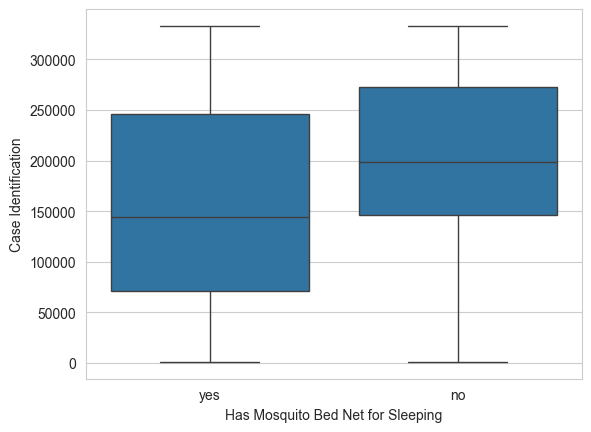

In [15]:
def plot_box(df, cols, col_x = 'Has Mosquito Bed Net for Sleeping'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(x=col_x, y=col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)   # Set text for y axis
        plt.show()

num_cols = ['Case Identification']
plot_box(df, num_cols)

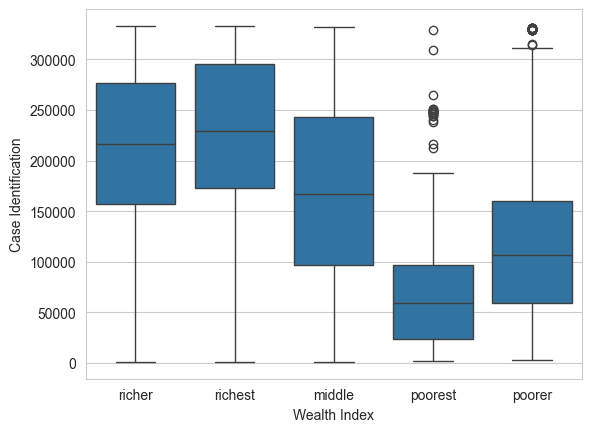

In [17]:
def plot_box(df, col, col_y = 'Case Identification'):
    sns.set_style("whitegrid")
    sns.boxplot(x=col, y=col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(df, 'Wealth Index')    

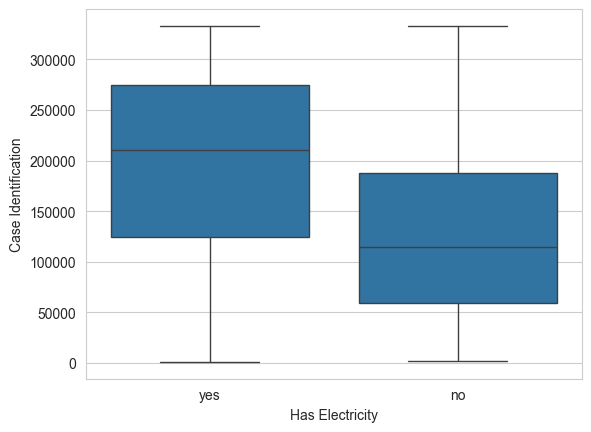

In [18]:
def plot_box(df, col, col_y = 'Case Identification'):
    sns.set_style("whitegrid")
    sns.boxplot(x=col,y=col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(df, 'Has Electricity')    

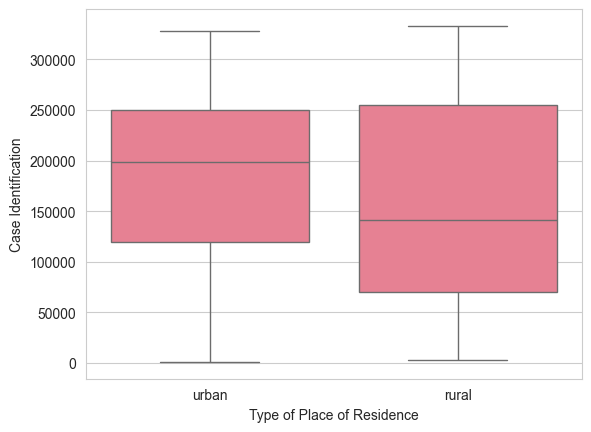

In [24]:
def plot_box(df, col, col_y = 'Case Identification'):
    sns.set_style("whitegrid")
    sns.boxplot(x=col, y=col_y, data=df)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(df, 'Type of Place of Residence')    

In [28]:
print("=== HOUSEHOLD SURVEY DATA ANALYSIS ===\n")
print("Dataset Overview:")
print(f"Total Households: {len(df)}")
print(f"Data Shape: {df.shape}")
print(f"Columns: {', '.join(df.columns)}")

print("\n" + "="*50)
print("BASIC STATISTICS")
print("="*50)

# Basic statistics
print(f"\nRegion: {df['Region'].unique()}")
print(f"State: {df['State'].unique()}")
print(f"All households are in: {df['Type of Place of Residence'].unique()}")



=== HOUSEHOLD SURVEY DATA ANALYSIS ===

Dataset Overview:
Total Households: 7744
Data Shape: (7744, 17)
Columns: Case Identification, Region, Type of Place of Residence, Source of Drinking Water, Type of Toilet Facility, Has Electricity, Main Floor Material, Main Wall Material, Main Roof Material, Has Bicycle, Has Motorcycle or Scooter, Has Car or Truck, Has Mosquito Bed Net for Sleeping, Owns Land Suitable for Agriculture, Has Bank Account, Wealth Index, State

BASIC STATISTICS

Region: ['north west' 'north east' 'north central' 'south west' 'south south'
 'south east']
State: ['sokoto' 'zamfara' 'katsina' 'jigawa' 'yobe' 'borno - urban' 'adamawa'
 'gombe' 'bauchi' 'kano' 'kaduna' 'kebbi' 'niger' 'fct abuja' 'nasarawa'
 'plateau' 'taraba' 'benue' 'kogi' 'kwara' 'oyo' 'osun' 'ekiti' 'ondo'
 'edo' 'anambra' 'enugu' 'ebonyi' 'cross river' 'akwa ibom' 'abia' 'imo'
 'rivers' 'bayelsa' 'delta' 'lagos' 'ogun']
All households are in: ['urban' 'rural']


In [30]:
# Wealth distribution
wealth_counts = df['Wealth Index'].value_counts()
print(f"\nWealth Index Distribution:")
for wealth, count in wealth_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {wealth}: {count} households ({percentage:.1f}%)")

# Water source analysis
water_counts = df['Source of Drinking Water'].value_counts()
print(f"\nWater Source Distribution:")
for source, count in water_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {source}: {count} households ({percentage:.1f}%)")




Wealth Index Distribution:
  richer: 1844 households (23.8%)
  richest: 1816 households (23.5%)
  middle: 1676 households (21.6%)
  poorer: 1351 households (17.4%)
  poorest: 1057 households (13.6%)

Water Source Distribution:
  tube well or borehole: 2795 households (36.1%)
  river/dam/lake/ponds/stream/canal/irrigation channel: 829 households (10.7%)
  unprotected well: 819 households (10.6%)
  sachet water: 786 households (10.1%)
  protected well: 785 households (10.1%)
  public tap/standpipe: 393 households (5.1%)
  unprotected spring: 349 households (4.5%)
  rainwater: 308 households (4.0%)
  piped into dwelling: 238 households (3.1%)
  piped to yard/plot: 101 households (1.3%)
  protected spring: 87 households (1.1%)
  piped to neighbor: 84 households (1.1%)
  tanker truck: 71 households (0.9%)
  bottled water: 68 households (0.9%)
  cart with small tank: 27 households (0.3%)
  other: 4 households (0.1%)


In [33]:
# Asset ownership analysis
assets = ['Has Bicycle', 'Has Motorcycle or Scooter', 'Has Car or Truck']
print(f"\nAsset Ownership:")
for asset in assets:
    owned = df[asset].value_counts().get('yes', 0)
    percentage = (owned / len(df)) * 100
    asset_name = asset.replace('Has_', '').replace('_', ' ')
    print(f"  {asset_name}: {owned}/{len(df)} households ({percentage:.1f}%)")

# Financial inclusion
bank_account = df['Has Bank Account'].value_counts().get('yes', 0)
land_ownership = df['Owns Land Suitable for Agriculture'].value_counts().get('yes', 0)
print(f"\nFinancial Inclusion & Land Ownership:")
print(f"  Bank Account: {bank_account}/{len(df)} households ({(bank_account/len(df)*100):.1f}%)")
print(f"  Agricultural Land: {land_ownership}/{len(df)} households ({(land_ownership/len(df)*100):.1f}%)")




Asset Ownership:
  Has Bicycle: 1397/7744 households (18.0%)
  Has Motorcycle or Scooter: 2565/7744 households (33.1%)
  Has Car or Truck: 965/7744 households (12.5%)

Financial Inclusion & Land Ownership:
  Bank Account: 3268/7744 households (42.2%)
  Agricultural Land: 4700/7744 households (60.7%)


Text(0, 0.5, '')

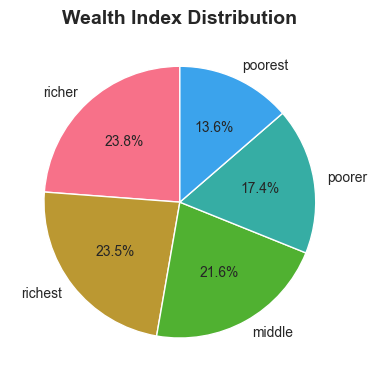

In [34]:
# Create visualizations
fig = plt.figure(figsize=(20, 15))

# 1. Wealth Index Distribution (Pie Chart)
plt.subplot(3, 3, 1)
wealth_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Wealth Index Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')

Text(0, 0.5, 'Number of Households')

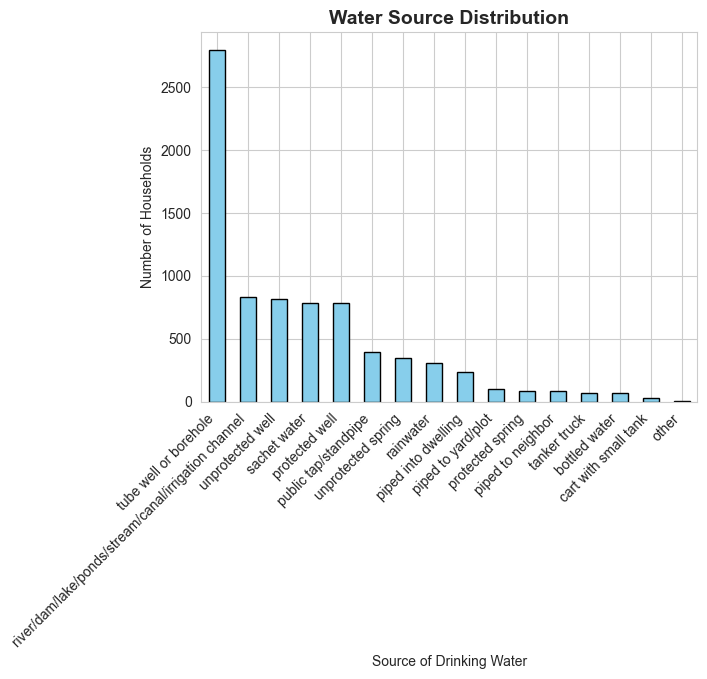

In [36]:
# 2. Water Source Distribution (Bar Chart)

water_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Water Source Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Households')

([0, 1, 2],
 [Text(0, 0, 'Has Bicycle'),
  Text(1, 0, 'Has Motorcycle or Scooter'),
  Text(2, 0, 'Has Car or Truck')])

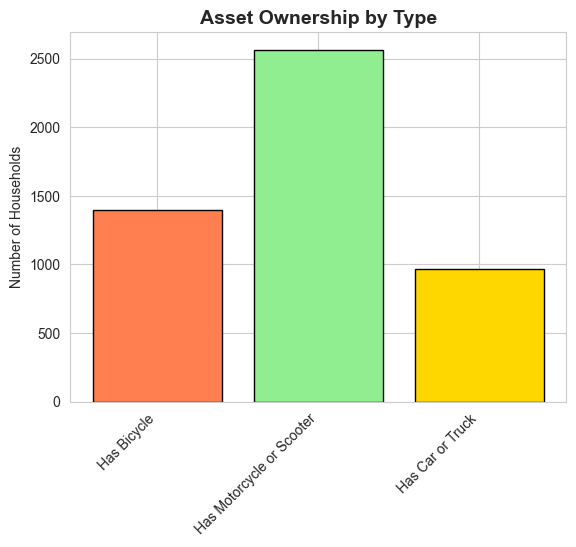

In [37]:
# 3. Asset Ownership Comparison

asset_data = []
asset_labels = []
for asset in assets:
    owned = df[asset].value_counts().get('yes', 0)
    asset_data.append(owned)
    asset_labels.append(asset.replace('Has_', '').replace('_', ' '))

plt.bar(asset_labels, asset_data, color=['coral', 'lightgreen', 'gold'], edgecolor='black')
plt.title('Asset Ownership by Type', fontsize=14, fontweight='bold')
plt.ylabel('Number of Households')
plt.xticks(rotation=45, ha='right')

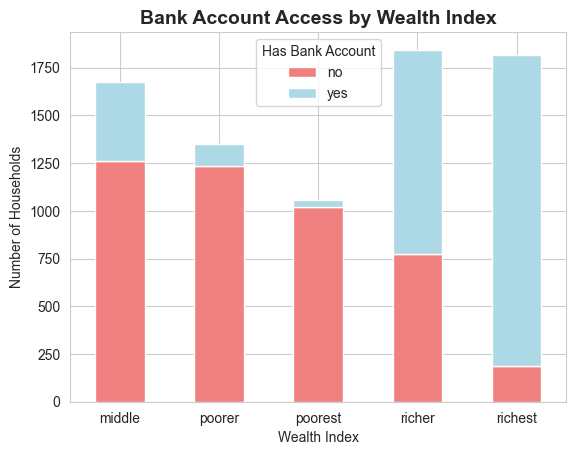

In [39]:
# 4. Bank Account vs Wealth Index

wealth_bank = pd.crosstab(df['Wealth Index'], df['Has Bank Account'])
wealth_bank.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Bank Account Access by Wealth Index', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Number of Households')
plt.legend(title='Has Bank Account')

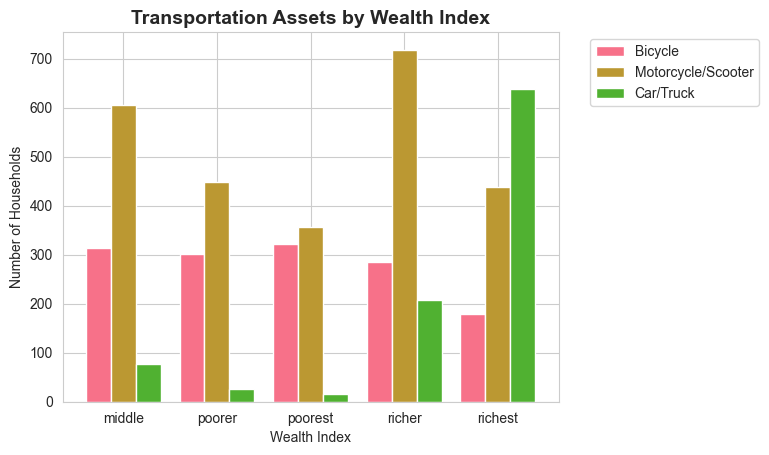

In [40]:
# 5. Transportation Assets by Wealth

transport_by_wealth = df.groupby('Wealth Index')[['Has Bicycle', 'Has Motorcycle or Scooter', 'Has Car or Truck']].apply(
    lambda x: (x == 'yes').sum()
)
transport_by_wealth.plot(kind='bar', width=0.8)
plt.title('Transportation Assets by Wealth Index', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Number of Households')
plt.legend(['Bicycle', 'Motorcycle/Scooter', 'Car/Truck'], bbox_to_anchor=(1.05, 1), loc='upper left')

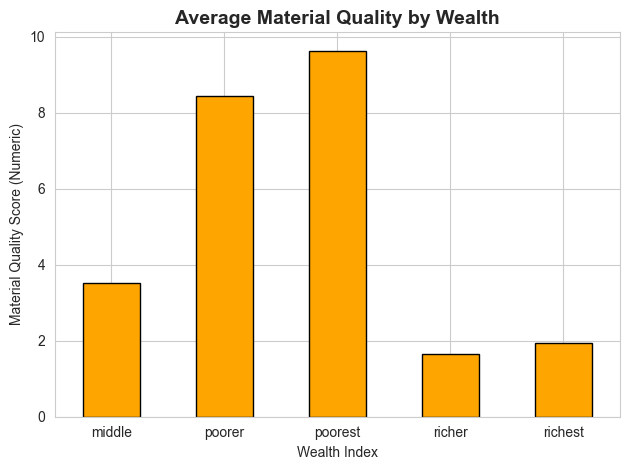

In [43]:
# 6. Material Quality Index (Floor + Wall materials as proxy)

# Assign numeric codes to each material type
floor_codes, _ = pd.factorize(df['Main Floor Material'])
wall_codes, _ = pd.factorize(df['Main Wall Material'])

# Calculate a numeric material quality score
df['Material Quality Score Numeric'] = floor_codes + wall_codes

material_by_wealth = df.groupby('Wealth Index')['Material Quality Score Numeric'].mean()
material_by_wealth.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Material Quality by Wealth', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Material Quality Score (Numeric)')
plt.tight_layout()

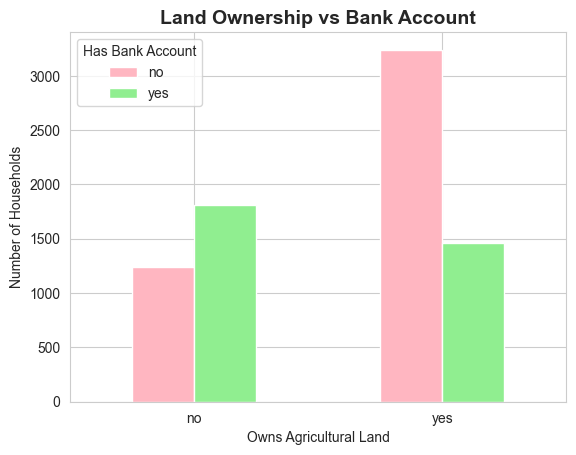

In [44]:
# 7. Land Ownership vs Bank Account

land_bank = pd.crosstab(df['Owns Land Suitable for Agriculture'], df['Has Bank Account'])
land_bank.plot(kind='bar', color=['lightpink', 'lightgreen'])
plt.title('Land Ownership vs Bank Account', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Number of Households')
plt.xlabel('Owns Agricultural Land')
plt.legend(title='Has Bank Account')

Text(0, 0.5, 'Asset Score')

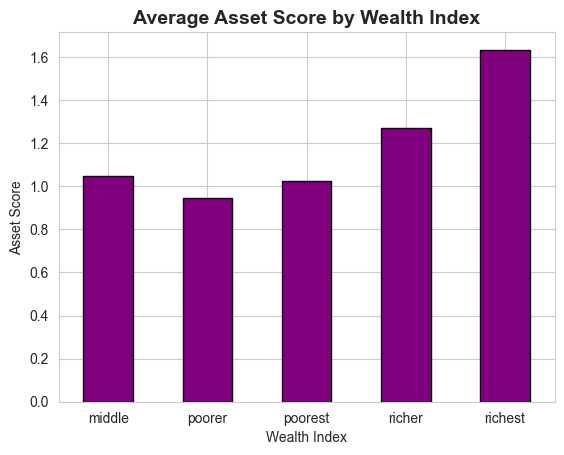

In [47]:
# 8. Comprehensive Asset Score

# Create an asset score (bicycle=1, motorcycle=2, car=3 points)
asset_scores = []
for _, row in df.iterrows():
    score = 0
    if row['Has Bicycle'] == 'yes':
        score += 1
    if row['Has Motorcycle or Scooter'] == 'yes':
        score += 2
    if row['Has Car or Truck'] == 'yes':
        score += 3
    asset_scores.append(score)

df['Asset_Score'] = asset_scores
asset_by_wealth = df.groupby('Wealth Index')['Asset_Score'].mean()
asset_by_wealth.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Average Asset Score by Wealth Index', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Asset Score')

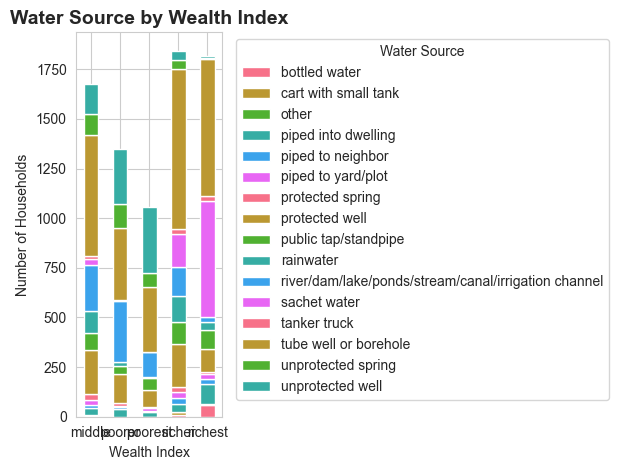

In [55]:
# 9. Water Source by Wealth Index
water_wealth = pd.crosstab(df['Wealth Index'], df['Source of Drinking Water'])
water_wealth.plot(kind='bar', stacked=True)

plt.title('Water Source by Wealth Index', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Number of Households')
plt.legend(title='Water Source', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()